In [1]:
import holoviews as hv
hv.extension('matplotlib')
import numpy as np
import pandas as pd
from scipy.optimize import fmin_tnc
from sklearn.preprocessing import PolynomialFeatures

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

# Loading data

In [2]:
df = pd.read_csv('ex2data1.txt', names=['x1', 'x2', 'y'], header=None)
df.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
X = df[['x1','x2']]
y = df['y']

In [4]:
df1 = df.copy()
X = np.column_stack((np.ones(X.shape[0]), X))
# Equivalent:
# X = np.vstack((np.ones(X.shape[0]), X)).T

In [5]:
theta = np.zeros(X.shape[1])

# Plotting data

:Points   [x1,x2]   (y)
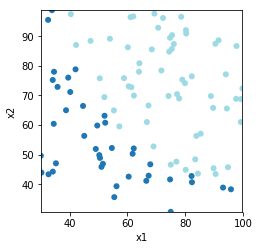

In [6]:
%%opts Points [color_index=2] (cmap='Category20')

hv.Points(df1, kdims=['x1', 'x2'], vdims='y')

# Cost and gradient descent

## Sigmoid

In [7]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-1 * z))
    return res

## Cost function

In [8]:
def compute_cost(theta, X, y):
    m = X.shape[0]
    h = sigmoid(np.dot(X, theta))
    J = (-1/m)*np.sum(y*np.log(h) - (1 - y)*np.log(1 - h))
    grad = (1/m)*np.dot(X.T, (h-y))
    return J, grad

In [9]:
%%time
compute_cost(theta, X, y)

CPU times: user 1.58 ms, sys: 651 µs, total: 2.23 ms
Wall time: 1.47 ms


(0.13862943611198905, array([ -0.1       , -12.00921659, -11.26284221]))

In [10]:
def compute_cost_vectorized(theta, X, y):
    m = X.shape[0]
    h = sigmoid(np.dot(X, theta))
    J = (1 / m)*(-1 * np.dot(y, np.log(h)) - np.dot((1 - y), np.log(1 - h)))
    grad = (1 / m) * np.dot(X.T, (h-y))
    return J, grad

In [11]:
%%time
compute_cost_vectorized(theta, X, y)

CPU times: user 1.08 ms, sys: 542 µs, total: 1.62 ms
Wall time: 998 µs


(0.6931471805599452, array([ -0.1       , -12.00921659, -11.26284221]))

## Fit / Optimizing using scipy fmin_tnc

In [12]:
# it works because cost function has theta as first argument
optimize = fmin_tnc(compute_cost_vectorized, x0=theta, args=(X, y))

In [13]:
# fprintf('Expected theta (approx):\n');
# fprintf(' -25.161\n 0.206\n 0.201\n');
theta_result = optimize[0]
theta_result

array([-25.16131869,   0.20623159,   0.20147149])

In [14]:
# fprintf('Expected cost (approx): 0.203\n');
compute_cost_vectorized(theta_result, X, y)

(0.20349770158947433, array([9.07652441e-09, 9.36760996e-08, 4.82243362e-07]))

:Overlay
   .Points.I :Points   [x1,x2]   (y)
   .Curve.I  :Curve   [x]   (y)
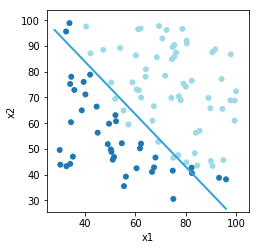

In [15]:
%%opts Points (cmap='Category20') [color_index=2]

scatter = hv.Points(df1, kdims=['x1', 'x2'], vdims='y')

xx = np.linspace(min(X[:,1])-2, max(X[:,1])+2)
yy = (-theta_result[0]-theta_result[1]*xx)/theta_result[2]

line = hv.Curve((xx,yy))

a = scatter * line

a[min(df1['x1'])-5 : max(df1['x1'])+5, min(df1['x2'])-5 : max(df1['x2'])+5]

## Predict and accuracies

In [16]:
def predict(theta, X):
    pred = sigmoid(X @ theta) >= 0.5
    return [int(p) for p in pred]

In [17]:
p = predict(theta_result, X)
accuracy = np.mean([int(i == j) for i,j in zip(p, y)])
accuracy

0.89

# Regularized logistic regression

In [18]:
df2 = pd.read_csv('ex2data2.txt', names=['x1', 'x2', 'y'], header=None)
X = df2[['x1','x2']]
y = df2['y'].values
# X = np.column_stack((np.ones(X.shape[0]), X))
lmbd=1

:Points   [x1,x2]   (y)
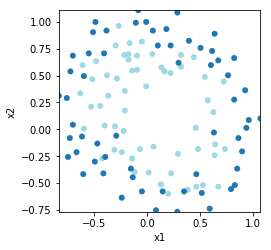

In [19]:
%%opts Points (cmap='Category20') [color_index=2]

scatter2 = hv.Points(df2, vdims='y')
scatter2

In [20]:
def compute_cost_regularized(theta, X, y, lmbd):
    m = X.shape[0]
    h = sigmoid(np.dot(X, theta))
    theta_excl_zero = np.array([0, *theta[1:]])
    J = (1 / m)*(-1 * np.dot(y, np.log(h)) - np.dot((1 - y), np.log(1 - h))) \
            + (lmbd / (2*m)) * np.sum(theta_excl_zero*theta_excl_zero)
    grad = (1 / m) * np.dot((h - y), X) \
            + np.dot((lmbd/m), theta_excl_zero)
    return J, grad

## All-in-one

In [21]:
def regularized_logistic_regression(X, y, lmbd, degree=6):
    # Convert to polynomial:
    X_poly = PolynomialFeatures(degree).fit_transform(X)
    theta_poly = np.zeros(X_poly.shape[1])
    # initial cost and gradient:
    J, grad = compute_cost_regularized(theta_poly, X_poly, y, lmbd)
    # gradient descent to get theta:
    theta, _, _ = fmin_tnc(compute_cost_regularized, x0=theta_poly, args=(X_poly, y, lmbd))
    # predict against X
    p = predict(theta, X_poly)
    # get accuracy by comparing against y
    accuracy = np.mean([int(i == j) for i,j in zip(p, y)])
    
    return J, grad, theta, p, accuracy, X_poly

In [22]:
J, grad, theta, p, accuracy, X_poly = regularized_logistic_regression(X, y, lmbd=1, degree=6)
# fprintf('Cost at initial theta (zeros): %f\n', cost);
# fprintf('Expected cost (approx): 0.693\n');
# fprintf('Expected gradients (approx) - first five values only:\n');
# fprintf(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n');
# fprintf('Expected accuracy (with lambda = 1): 83.1 (approx)\n');
J, grad, accuracy

(0.6931471805599453,
 array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
        1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
        8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
        1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
        4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
        3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
        4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02]),
 0.8305084745762712)

In [23]:
# def area(lmbd):
#     xx = np.linspace(min(df2['x1'])-5, max(df2['x1'])+5, 100)
#     yy = np.linspace(min(df2['x2'])-5, max(df2['x2'])+5, 100)
#     mesh = np.meshgrid(xx, yy, indexing='xy')
#     # zz = np.zeros((xx.size,yy.size))
#     mesh = mesh[0].reshape(5000,2)

#     J, grad, theta, p, accuracy, X_poly = regularized_logistic_regression(mesh, np.ones(mesh.shape[0]), 1)
    
#     zz = np.polynomial.polynomial.polyval2d(xx, yy, c=theta)
    
#     return {'x': xx, 'y': yy, 'z': zz, 'lambda': lmbd}

In [24]:
xx = np.linspace(min(df2['x1']), max(df2['x1']),100)
yy = np.linspace(min(df2['x2']), max(df2['x2']),100)
zz = np.zeros((xx.shape[0], yy.shape[0]))

for i in range(xx.shape[0]):
    for j in range(yy.shape[0]):
        zz[i,j] = np.dot(PolynomialFeatures(6).fit_transform(np.array([[xx[i], yy[j]]])), theta)
        zz[i,j] = int(zz[i,j] < 0.5)

In [25]:
def area(lmbd):
    xx = np.linspace(min(df2['x1']), max(df2['x1']), 100)
    yy = np.linspace(min(df2['x2']), max(df2['x2']), 100)
    zz = np.zeros((xx.shape[0], yy.shape[0]))

    dg=6
    J, grad, theta, p, accuracy, X_poly = regularized_logistic_regression(X, y, lmbd=lmbd, degree=dg)

    for (i,j), val in np.ndenumerate(zz):
        zz[i,j] = int(sigmoid(np.dot(PolynomialFeatures(dg).fit_transform(np.array([[xx[i],yy[j]]])), theta)) < 0.5)
    return zz

In [26]:
def area_w_names(lmbd):
    xx = np.linspace(min(df2['x1']), max(df2['x1']), 100)
    yy = np.linspace(min(df2['x2']), max(df2['x2']), 100)
    zz = np.zeros((xx.shape[0], yy.shape[0]))

    dg=6
    J, grad, theta, p, accuracy, X_poly = regularized_logistic_regression(X, y, lmbd=lmbd, degree=dg)

    for (i,j), val in np.ndenumerate(zz):
        zz[i,j] = int(sigmoid(np.dot(PolynomialFeatures(dg).fit_transform(np.array([[xx[i],yy[j]]])), theta)) < 0.5)
    return xx, yy, zz

In [27]:
img0area = area(0)
img1area = area(1)
img100area = area(100)
xx, yy, zz = area_w_names(0)

:Layout
   .Overlay.I   :Overlay
      .Contours.I :Contours   [x,y]   (z)
      .Points.I   :Points   [x1,x2]   (y)
   .Overlay.II  :Overlay
      .Contours.I :Contours   [x,y]   (z)
      .Points.I   :Points   [x1,x2]   (y)
   .Overlay.III :Overlay
      .Contours.I :Contours   [x,y]   (z)
      .Points.I   :Points   [x1,x2]   (y)
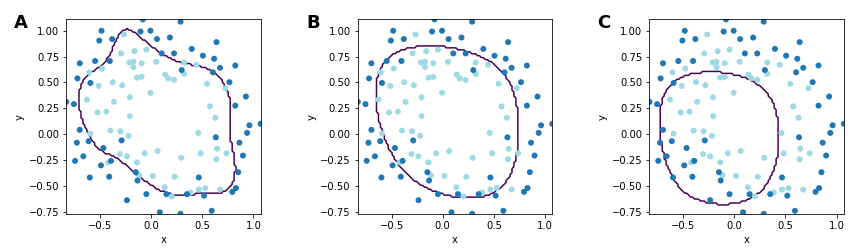

In [30]:
%%opts Points (cmap='Category20') [color_index=2]

bounds=(min(df2['x1']),min(df2['x2']),max(df2['x1']),max(df2['x2']))   # Coordinate system: (left, bottom, top, right)

img0 = hv.Image(img0area.T[::-1], bounds=bounds)
img0 = hv.operation.contours(img0, levels=0)

img1 = hv.Image(img1area.T[::-1], bounds=bounds)
img1 = hv.operation.contours(img1, levels=0)

img10 = hv.Image(img100area.T[::-1], bounds=bounds)
img10 = hv.operation.contours(img10, levels=0)

img0 * scatter2 + img1 * scatter2 + img10 * scatter2
# line